<font size = 7.0 color ='336EFF'>Capital Evolution Using Random Walks</font>



---

Imagine that you are going to found your own insurance agency. In class we said that we could model the evolution of capital with a variation of the random walk:

$X_0 = C$ \
$X_j = X_{j-1} + (E_j - S_j)$

Where $X_j$ is the capital in time $j$, and $C$ is the initial capital at time zero. At each time $j$, there are entries $E_j$ (what you charge your clients) and $S_j$ are the outputs (the claims that pay in the event of an accident). With this data do the following:

**1. Using real data, research statistics on what an insurer tends to pay in insurance claims.**

You must decide two things:
- The business of your insurer (e.g. if it is for hotels, for cars, if it is for life insurance, etc.)
- The period of time in which you want to do the modeling (for example every month). This will give you an idea of the variable $S_j$. You can make the simplification of considering Gaussian behavior, or you can use another distribution.



I chose **life insurance as my insurer's line of business.** \
The period of time in which I will do the modeling will be **every month,** since claim payments can vary and be distributed throughout the year.

## Data



---



According to: https://www.gob.mx/cms/uploads/attachment/file/839207/ANUARIO_ESTAD_STICO_DE_SEGUROS_Y_FIANZAS_2022_VF.pdf



We have the following statistics:

"In 2022 **56 billion pesos** of amounts claimed by
claims in Life, of which 41 billion pesos corresponded
to Group Life and 15 billion pesos to Individual Life. Likewise, it
They had **628 thousand claims for Life insurance."**

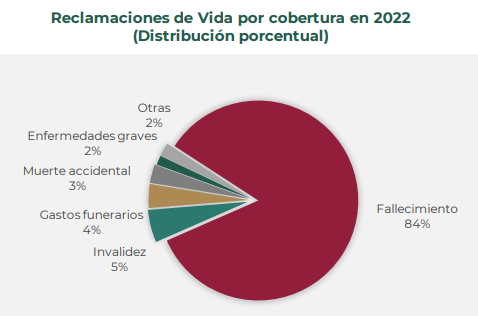

Acording to: https://www.bbva.com/es/mx/salud-financiera/seguro-de-vida-una-forma-de-proteger-y-asegurar-el-futuro-de-la-familia/#:~:text=De%20acuerdo%20con%20la%20Asociaci%C3%B3n,Poblaci%C3%B3n%20Econ%C3%B3micamente%20Activa%20(PEA).

"According to the Mexican Association of Insurance Institutions (AMIS), in Mexico only **8.5 million people have life insurance,** which is equivalent to 20% of the Economically Active Population (PEA)."

## Using the data

---

**2. Based on the above, think about how much you would like to charge and with what variability.**

  In other words, cook up a distribution for $E_j$. Again, Gaussian simplification may be a good start.



In [6]:
import numpy as np
import matplotlib.pyplot as plt

1. Total amount claimed in 2022: 56,000 million pesos.
2. Total number of certificates (policies): 8.5 million.
3. Total claims in one year: 628,000.

In [7]:
total_claimed_amount = 56000e6  # Total claimed amount in pesos
annual_total_claims = 628000

average_claim_amount = total_claimed_amount / annual_total_claims

average_monthly_claim_amount = total_claimed_amount / 12
average_monthly_claims = annual_total_claims / 12

In [8]:
# INPUTS
mean_Ej = average_monthly_claim_amount  # This is the mean
individual_claim_estimate = 0.25 * average_claim_amount  # We assume the estimate is 25% of the average claim amount
std_dev_Ej = (average_monthly_claims * individual_claim_estimate**2)**0.5  # This is the standard deviation
Ej_samples = np.random.normal(mean_Ej, std_dev_Ej, 10000)  # (mean, standard deviation, number of samples)

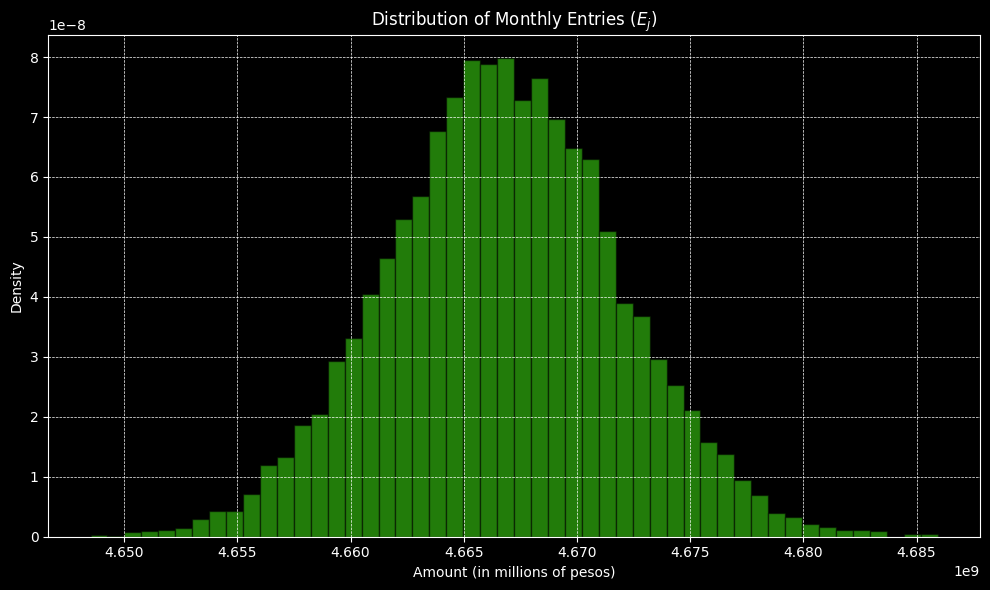

In [9]:
plt.figure(figsize = (10,6))
plt.style.use('dark_background')
plt.hist(Ej_samples, bins = 50, alpha = 0.5, color = '#44f814', density = True, edgecolor = 'black')
plt.title('Distribution of Monthly Entries ($E_j$)')
plt.xlabel('Amount (in millions of pesos)')
plt.ylabel('Density')
plt.grid(True, which = "both", linestyle = "--", linewidth = 0.5)
plt.tight_layout()
plt.show()

In [10]:
mean_Ej  # Mean, the assets / what we would like to collect.

4666666666.666667

$4,666,666,666

In [11]:
std_dev_Ej # Standard Deviation, but with this variability.

5099852.21050592

$5,099,852

## Adding the capital

---

**3. Now imagine how much capital you are going to start your insurance company with.**

  The more capital the better... but getting capital is not easy. As you will want the least capital possible to guarantee that your insurer will not go bankrupt (this continues in the next point).



In [12]:
# Estimates for Outputs
std_dev_Sj = std_dev_Ej * 1.10  # Here we show that we have a certain percentage of profit
Sj_samples = np.random.normal(mean_Ej, std_dev_Sj, 10000)

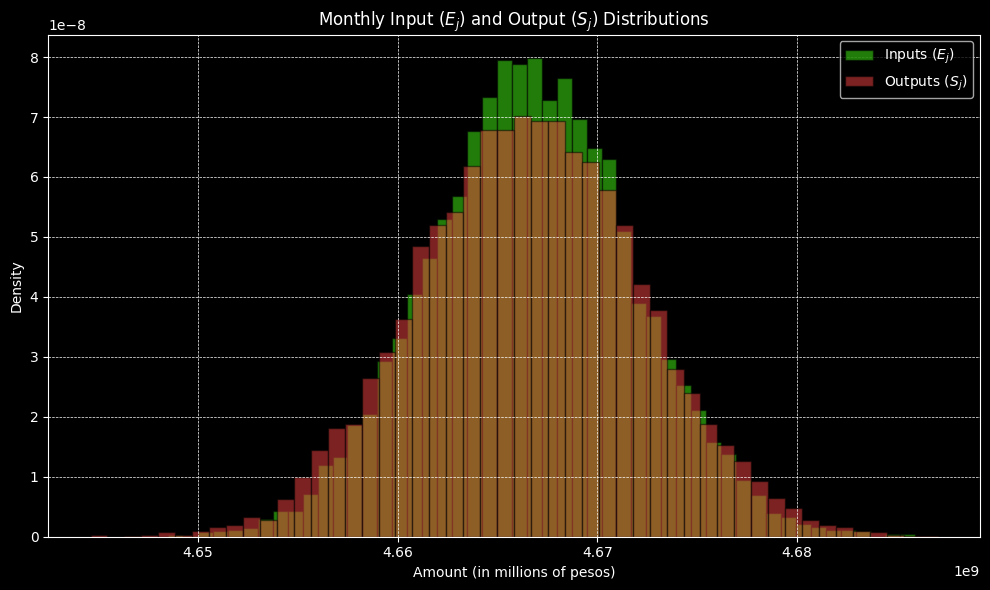

In [13]:
plt.figure(figsize = (10, 6))
plt.hist(Ej_samples, bins = 50, alpha = 0.5, color = '#44f814', label = 'Inputs ($E_j$)', density = True, edgecolor = 'black')
plt.hist(Sj_samples, bins = 50, alpha = 0.5, color = '#f84444', label = 'Outputs ($S_j$)', density = True, edgecolor = 'black')
plt.title('Monthly Input ($E_j$) and Output ($S_j$) Distributions')
plt.xlabel('Amount (in millions of pesos)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, which = "both", linestyle = "--", linewidth = 0.5)
plt.tight_layout()
plt.show()

## Capital simulation using random walks

---

**4. With all the previous ingredients you can do simulations on the computer.**

Play with the initial capital and the prices you would charge to ensure that your insurer has a 90% probability of not going bankrupt in a certain number of years (for example 50).

In [14]:
def simulate_evolution(initial_capital, months):
    capital_history = [initial_capital]
    for i in range(months):
        Ej = np.random.normal(mean_Ej, std_dev_Ej)
        Sj = np.random.normal(mean_Ej, std_dev_Sj)
        capital = capital_history[-1] + Ej - Sj
        capital_history.append(capital)
        if capital <= 0:
            break
    return capital_history

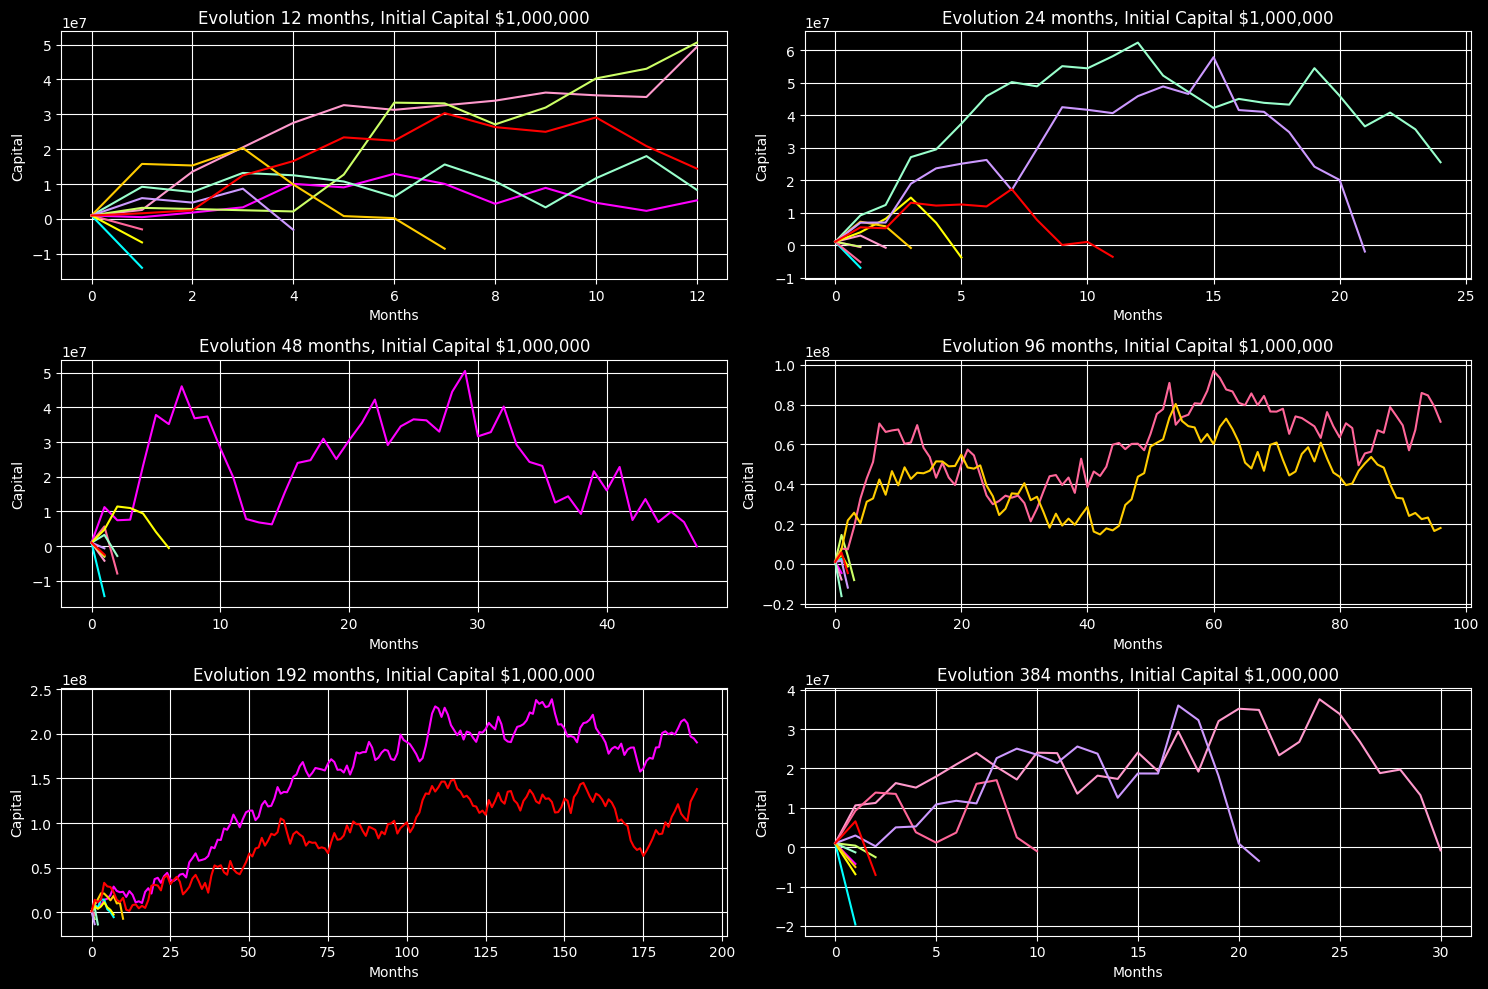

In [15]:
initial_capital = 1000000
num_simulations = 10
months_list = [12, 24, 48, 96, 192, 384]
neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

plt.figure(figsize=(15, 10))

for index, months in enumerate(months_list):
    plt.subplot(3, 2, index + 1)
    for i in range(num_simulations):
        capital_trajectory = simulate_evolution(initial_capital, months)
        plt.plot(capital_trajectory, label = f'Simulation {i+1}', color = neon_colors[i])
    formatted_initial_capital = "{:,}".format(initial_capital)
    plt.title(f'Evolution {months} months, Initial Capital ${formatted_initial_capital}')
    plt.xlabel("Months")
    plt.ylabel("Capital")
    # plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## IT IS NOTED THAT WITH INITIAL CAPITAL OF $1,000,000 EVENTUALLY OUR COMPANY WILL GO BANKRUPTCY.

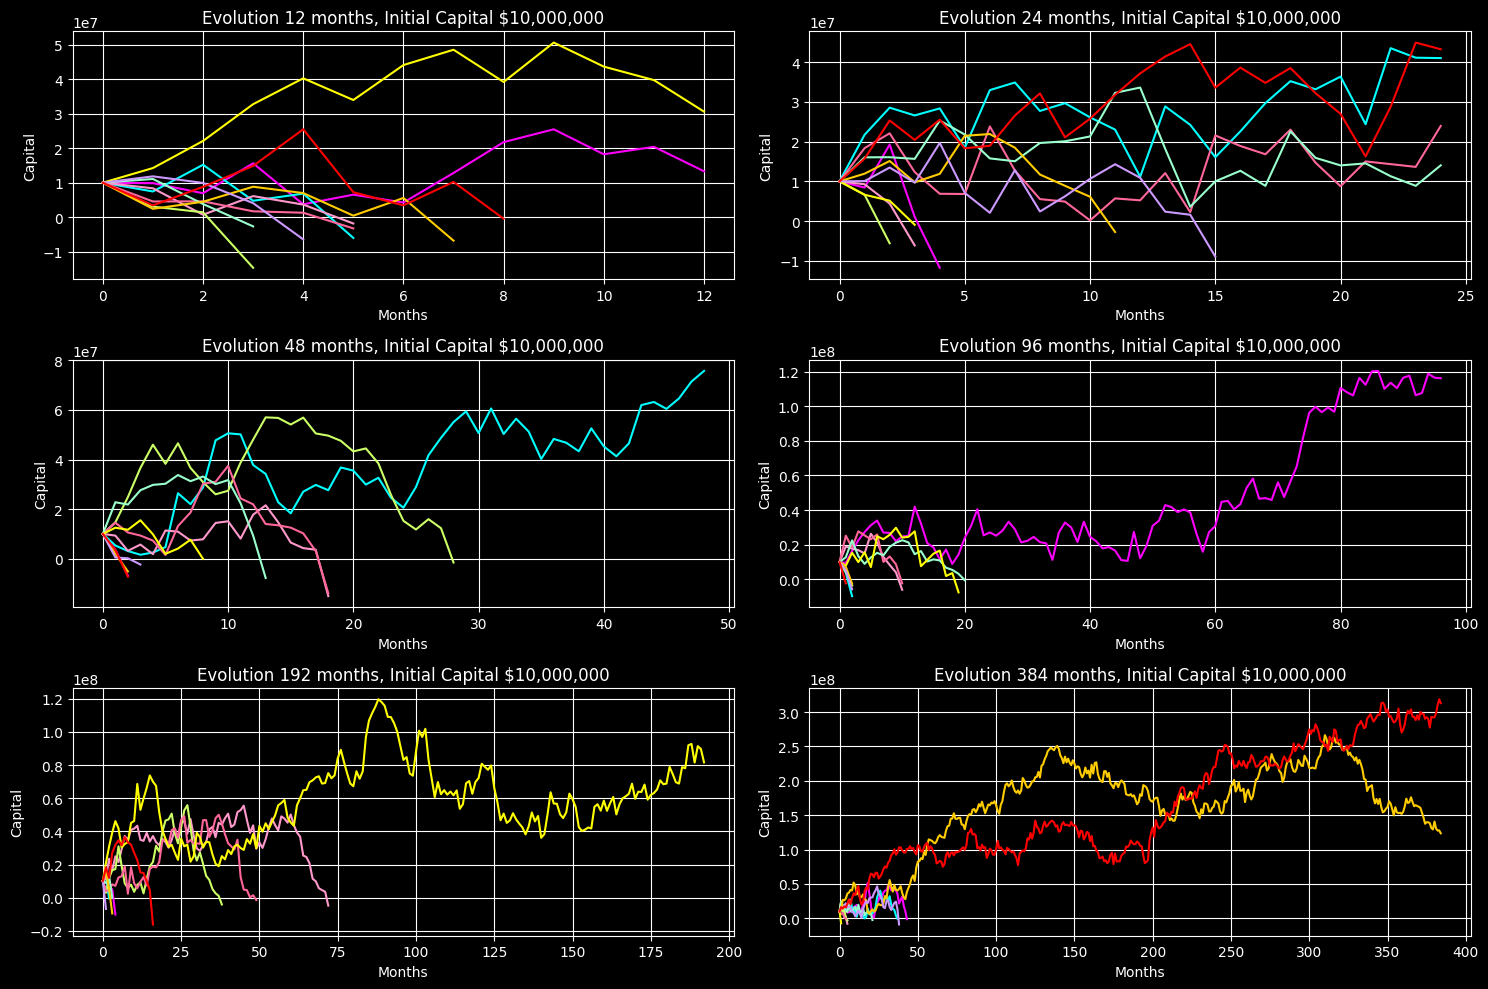

In [16]:
initial_capital = 10000000
num_simulations = 10
months_list = [12, 24, 48, 96, 192, 384]
neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

plt.figure(figsize=(15, 10))

for index, months in enumerate(months_list):
    plt.subplot(3, 2, index + 1)
    for i in range(num_simulations):
        capital_trajectory = simulate_evolution(initial_capital, months)
        plt.plot(capital_trajectory, label = f'Simulation {i+1}', color = neon_colors[i])
    formatted_initial_capital = "{:,}".format(initial_capital)
    plt.title(f'Evolution {months} months, Initial Capital ${formatted_initial_capital}')
    plt.xlabel("Months")
    plt.ylabel("Capital")
    # plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## IT STARTS TO BE NOTICED THAT WITH THE INITIAL CAPITAL OF $10,000,000 IN SOME CASES THE COMPANY WILL BE WELL BUT IN MOST CASES EVENTUALLY OUR COMPANY WILL ALSO GO TO BANKRUPTCY.

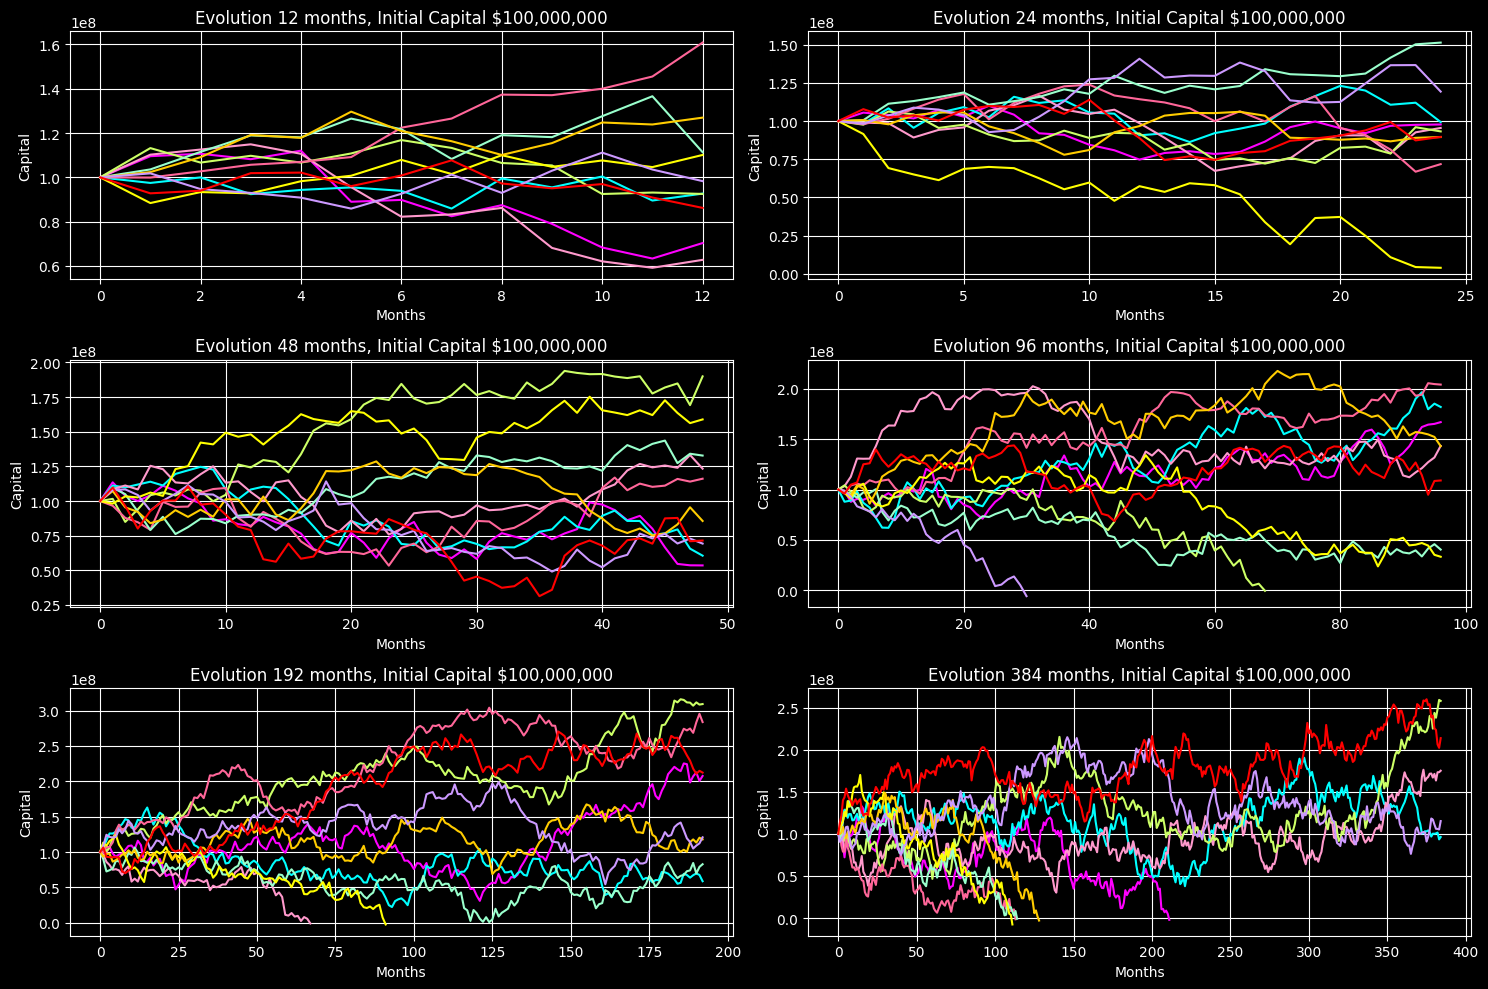

In [17]:
initial_capital = 100000000
num_simulations = 10
months_list = [12, 24, 48, 96, 192, 384]
neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

plt.figure(figsize=(15, 10))

for index, months in enumerate(months_list):
    plt.subplot(3, 2, index + 1)
    for i in range(num_simulations):
        capital_trajectory = simulate_evolution(initial_capital, months)
        plt.plot(capital_trajectory, label = f'Simulation {i+1}', color = neon_colors[i])
    formatted_initial_capital = "{:,}".format(initial_capital)
    plt.title(f'Evolution {months} months, Initial Capital ${formatted_initial_capital}')
    plt.xlabel("Months")
    plt.ylabel("Capital")
    # plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## WE STARTED TO SEE PATHS WHERE THE COMPANY DOES NOT GO TO BANKRUPTCY IN THE ESTIMATED PERIOD OF TIME, BUT WE STILL SEE MANY PATHS WHERE THE COMPANY DOES GO TO BANKRUPTCY.

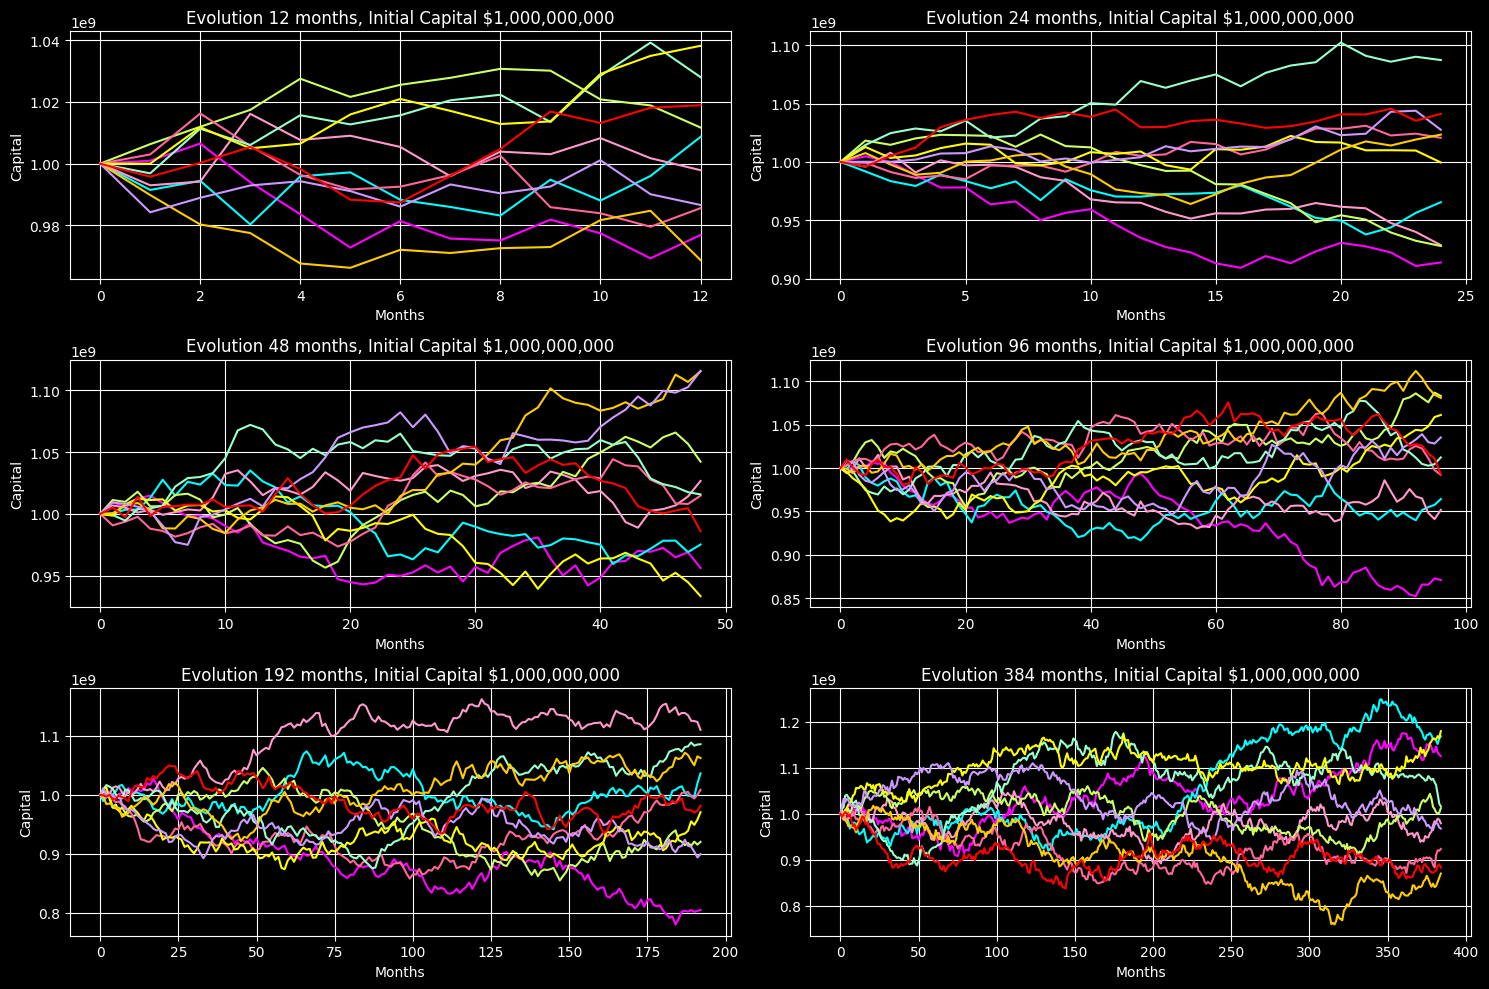

In [18]:
initial_capital = 1000000000
num_simulations = 10
months_list = [12, 24, 48, 96, 192, 384]
neon_colors = ['#ff00ff', '#00ffff', '#ff99cc', '#ccff66', '#ff6699', '#99ffcc', '#ffff00', '#ffcc00', '#cc99ff', '#ff0000']

plt.figure(figsize=(15, 10))

for index, months in enumerate(months_list):
    plt.subplot(3, 2, index + 1)
    for i in range(num_simulations):
        capital_trajectory = simulate_evolution(initial_capital, months)
        plt.plot(capital_trajectory, label = f'Simulation {i+1}', color = neon_colors[i])
    formatted_initial_capital = "{:,}".format(initial_capital)
    plt.title(f'Evolution {months} months, Initial Capital ${formatted_initial_capital}')
    plt.xlabel("Months")
    plt.ylabel("Capital")
    # plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## WE CAN SEE THAT WITH AN INITIAL CAPITAL OF $1,000,000,000 AFTER 32 YEARS (384 MONTHS) IN NO SIMULATION DID THE COMPANY GO FOR BANKRUPTCY.

## Evolution of the Capital after 50 years...

---

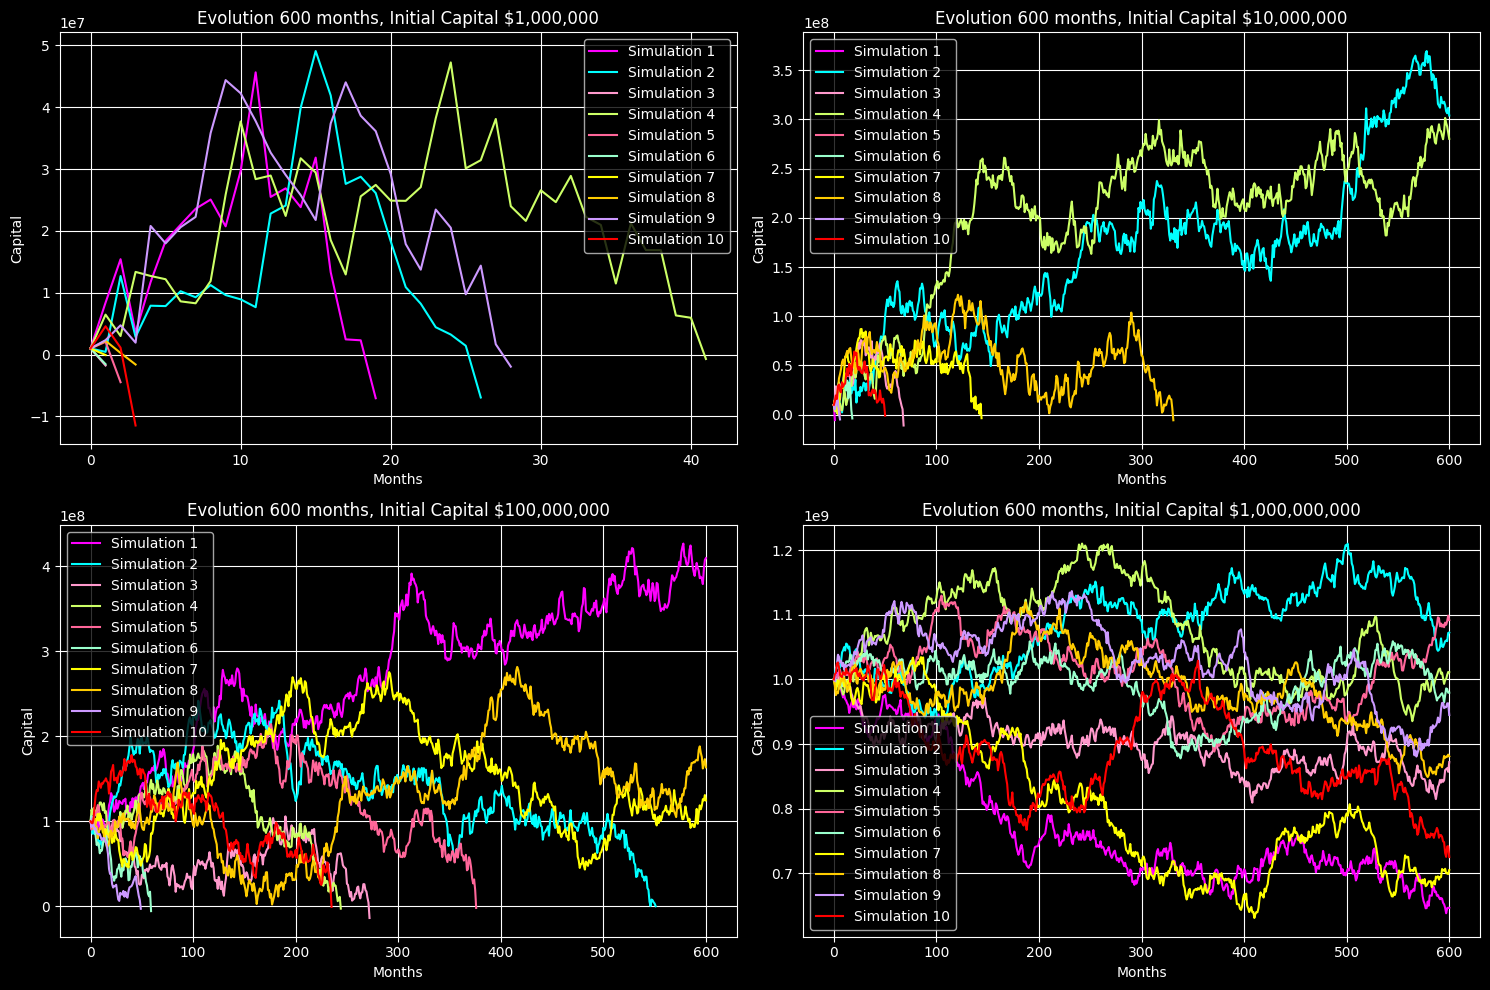

In [19]:
initial_capitals = [1000000, 10000000, 100000000, 1000000000]
num_simulations = 10
months = 600

plt.figure(figsize = (15, 10))

for index, initial_capital in enumerate(initial_capitals):
    plt.subplot(2, 2, index + 1)
    for i in range(num_simulations):
        capital_trajectory = simulate_evolution(initial_capital, months)
        plt.plot(capital_trajectory, label = f'Simulation {i+1}', color = neon_colors[i])
    formatted_initial_capital = "{:,}".format(initial_capital)
    plt.title(f'Evolution {months} months, Initial Capital ${formatted_initial_capital}')
    plt.xlabel("Months")
    plt.ylabel("Capital")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## WE SEE THAT WITH AN INITIAL CAPITAL OF $1,000,000,000 AT NO TIME WILL THE COMPANY GO BANKRUPTCY AFTER 600 MONTHS (A LITTLE OVER 50 YEARS)